In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset= pd.read_csv("Speed Dating Data.csv", encoding='ISO-8859-1')

In [2]:
#Parcourons la dataset
dataset.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [4]:
# il y a eu 8378 rencontres
dataset.shape

(8378, 195)

In [5]:
#552 participants
dataset.iid.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
       171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 18

## Répartion homme/femme

In [7]:
#Répartion homme/femme: 50,06%/49.94%

RepartitionHF = dataset.gender.apply(lambda x:
                                     "Homme" if x==1
                                     else "Femme" if x == 0
                                     else None)
Rep_chart=RepartitionHF.value_counts(normalize=True)*100

Rep_chart


Homme    50.05968
Femme    49.94032
Name: gender, dtype: float64

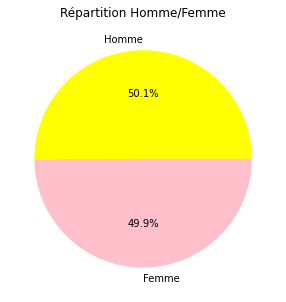

In [12]:
plt.figure(figsize=(5,5))
colors=['yellow','pink']
plt.pie(Rep_chart.values,labels=Rep_chart.index,autopct='%1.1f%%',colors=colors)
plt.title("Répartition Homme/Femme")
plt.show()

## Répartion selon l'age

C:\Users\jrala\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\jrala\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


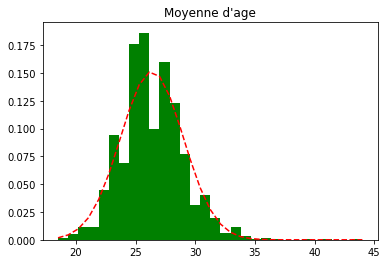

In [73]:
#comment est reparti la population selon l'age
age=(dataset.age+dataset.age_o)/2
bins=30
mu=age.mean()
sigma=np.std(age)

n, bins, patches=plt.hist(age,bins,facecolor='g',density=True)

y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
plt.plot(bins, y, color="r",linestyle="--")
plt.title("Moyenne d'age")

plt.show()

## Deuxième rendez-vous

In [6]:
#Regardant le nombre de rencontres ayant abouti à un deuxième RDV:
# 16,5% de rencontres ont matchés

match = dataset.match.apply(lambda x:
                                     "yes" if x==1
                                     else "no" if x == 0
                                     else None)
match_chart =match.value_counts(normalize=True)*100
match_chart

no     83.528288
yes    16.471712
Name: match, dtype: float64

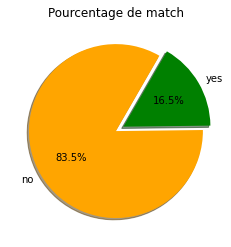

In [11]:
colors2=['orange','green']
plt.title("Pourcentage de match")
plt.pie(match_chart.values,labels=match_chart.index,autopct='%1.1f%%',colors=colors2,explode=(0,0.1), 
        shadow=True, startangle=60)
plt.show()

# A partir de maintenant nous allons nous focaliser sur les match

In [13]:
yes_dataset = dataset[dataset.match==1]

In [15]:
yes_dataset.shape

(1380, 195)

## La race influence t'elle?

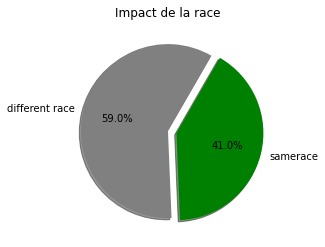

In [71]:
# intéressons nous à la variable "samerace"
samerace = yes_dataset.samerace.apply(lambda x:
                                     "samerace" if x==1
                                     else "different race" if x == 0
                                     else None)
samerace_chart =samerace.value_counts(normalize=True)*100

colors2=['grey','green']
plt.title("Impact de la race")
plt.pie(samerace_chart.values,labels=samerace_chart.index,autopct='%1.1f%%',colors=colors2,explode=(0,0.1), 
        shadow=True, startangle=60)
plt.show()


## Qu'en es t'il da la différence d'age?

In [32]:
yes_dataset.age.describe()

count    1362.000000
mean       26.077093
std         3.323475
min        19.000000
25%        24.000000
50%        26.000000
75%        28.000000
max        42.000000
Name: age, dtype: float64

In [33]:
yes_dataset.age_o.describe()

count    1362.000000
mean       26.077093
std         3.323475
min        19.000000
25%        24.000000
50%        26.000000
75%        28.000000
max        42.000000
Name: age_o, dtype: float64

C:\Users\jrala\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\jrala\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


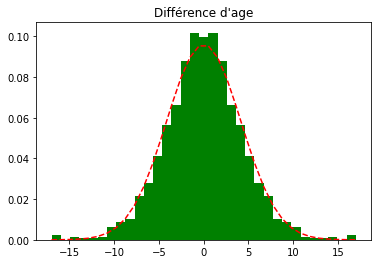

In [63]:
diff_age=yes_dataset.age-yes_dataset.age_o
bins=33
mu=diff_age.mean()
sigma=np.std(diff_age)

n, bins, patches=plt.hist(diff_age,bins,facecolor='g',density=True)

y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
plt.plot(bins, y, color="r",linestyle="--")
plt.title("Différence d'age")

plt.show()

C:\Users\jrala\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\jrala\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


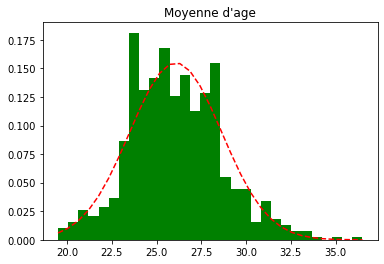

In [72]:
moy_age=(yes_dataset.age+yes_dataset.age_o)/2
bins=30
mu=moy_age.mean()
sigma=np.std(moy_age)

n, bins, patches=plt.hist(moy_age,bins,facecolor='g',density=True)

y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
plt.plot(bins, y, color="r",linestyle="--")
plt.title("Moyenne d'age")

plt.show()

## Parmi les match, quelles étaient les attentes de la soirées?

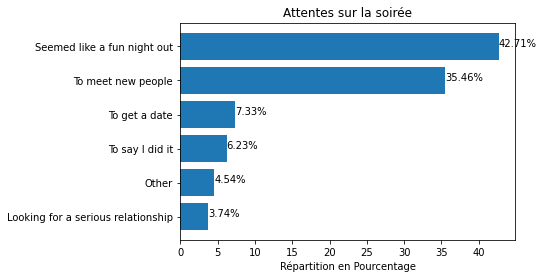

In [87]:
but = yes_dataset.goal.apply(lambda x: 
                                
                                "Seemed like a fun night out" if x==1
                                else "To meet new people" if x == 2
                                else "To get a date" if x == 3
                                else "Looking for a serious relationship" if x == 4
                                else "To say I did it" if x ==5
                                else "Other" if x == 6
                                else None)

but_data = np.round(but.value_counts(ascending=True,dropna=True,normalize=True)*100,2)

plt.title("Attentes sur la soirée")
plt.barh(but_data.index,but_data.values)
plt.xlabel("Répartition en Pourcentage")

for i in range(len(but_data.values)):
    plt.text(but_data.values[i], but_data.index[i],'{}%'.format(but_data.values[i]))

## Parmi les "match",l'historique des "date"

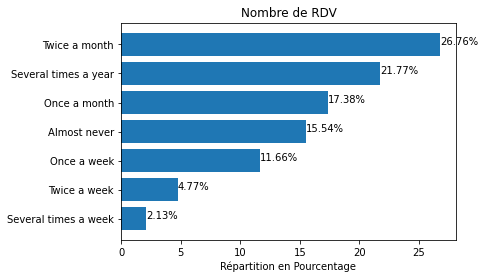

In [88]:
rdv = yes_dataset.date.apply(lambda x: 
                                
                                "Several times a week" if x==1
                                else "Twice a week" if x == 2
                                else "Once a week" if x == 3
                                else "Twice a month" if x == 4
                                else "Once a month" if x ==5
                                else "Several times a year" if x ==6
                                else "Almost never" if x == 7
                                else None)

rdv_data = np.round(rdv.value_counts(ascending=True,dropna=True,normalize=True)*100,2)

plt.title("Nombre de RDV")
plt.barh(rdv_data.index,rdv_data.values)
plt.xlabel("Répartition en Pourcentage")

for i in range(len(rdv_data.values)):
    plt.text(rdv_data.values[i], rdv_data.index[i],'{}%'.format(rdv_data.values[i]))

# Différenciation des hommes et des femmes

In [208]:
# Création d'un dataset homme
yes_hom_dataset=yes_dataset[yes_dataset.gender==1]

# Création d'un dataset femme
yes_fem_dataset=yes_dataset[yes_dataset.gender==0]


In [117]:
yes_hom_dataset.gender.unique()

array([1], dtype=int64)

In [118]:
yes_fem_dataset.gender.unique()

array([0], dtype=int64)

## Ce que l'on recherche chez l'autre

In [228]:
# cas homme

h_tab_attribut_in_the_opposite=np.round([yes_hom_dataset.attr1_1.mean(),
                                         yes_hom_dataset.sinc1_1.mean(),
                                         yes_hom_dataset.intel1_1.mean(),
                                         yes_hom_dataset.fun1_1.mean(),
                                         yes_hom_dataset.amb1_1.mean(),
                                         yes_hom_dataset.shar1_1.mean()],0)

h_attribut_in_the_opposite=['Attractive',
                            'Sincere',
                            'Intelligent',
                            'Fun',
                            'Ambitious',
                            'Has shared interests/hobbies']
color=['b','orange','g','r','yellow','grey']

data1 = {'Label':h_attribut_in_the_opposite,
        'Note':h_tab_attribut_in_the_opposite,
        'Color':color}
# Create DataFrame
df1 = pd.DataFrame(data1)
df1=df1.sort_index(by='Note', ascending = False)


# cas femme

f_tab_attribut_in_the_opposite=np.round([yes_fem_dataset.attr1_1.mean(),
                                         yes_fem_dataset.sinc1_1.mean(),
                                         yes_fem_dataset.intel1_1.mean(),
                                         yes_fem_dataset.fun1_1.mean(),
                                         yes_fem_dataset.amb1_1.mean(),
                                         yes_fem_dataset.shar1_1.mean()],0)

f_attribut_in_the_opposite=['Attractive',
                            'Sincere',
                            'Intelligent',
                            'Fun',
                            'Ambitious',
                            'Has shared interests/hobbies']

data2 = {'Label':f_attribut_in_the_opposite,
        'Note':f_tab_attribut_in_the_opposite,
        'Color':color}
# Create DataFrame
df2 = pd.DataFrame(data2)
df2=df2.sort_index(by='Note', ascending = False)


C:\Users\jrala\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
C:\Users\jrala\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)


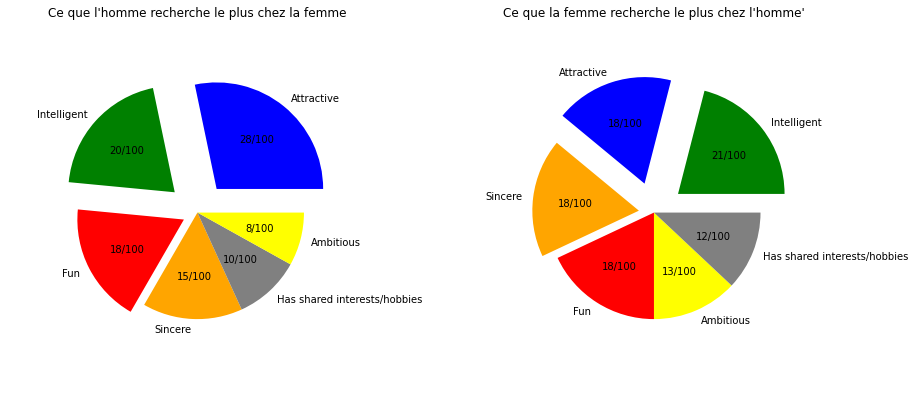

In [229]:

plt.figure(figsize=(15,7))

plt.subplot(121)
labels = df1.Label
sizes = df1.Note
plt.pie(sizes, labels=labels,autopct='%.0f/100',shadow=False,radius=0.7,explode=(0.2,0.2,0.1,0,0,0),colors=df1.Color)
plt.title("Ce que l'homme recherche le plus chez la femme")

plt.subplot(122)
labels = df2.Label
sizes = df2.Note
plt.pie(sizes, labels=labels, autopct='%.0f/100',shadow=False,radius=0.7,explode=(0.2,0.2,0.1,0,0,0),colors=df2.Color)
plt.title("Ce que la femme recherche le plus chez l'homme'")
plt.show()




## Ce qui a le plus compté dans notre décision

In [212]:
# ce qui à le plus compté ds ma décision

# cas homme

h_tab_decision=np.round([yes_hom_dataset.attr7_2.mean(),                      
                         yes_hom_dataset.sinc7_2.mean(),
                         yes_hom_dataset.intel7_2.mean(),
                         yes_hom_dataset.fun7_2.mean(),
                         yes_hom_dataset.amb7_2.mean(),
                         yes_hom_dataset.shar7_2.mean()],2)

h_decision=['Attractive',
            'Sincere',
            'Intelligent',
            'Fun',
            'Ambitious',
            'Has shared interests/hobbies']

# cas femme

f_tab_decision=np.round([yes_fem_dataset.attr7_2.mean(),                      
                         yes_fem_dataset.sinc7_2.mean(),
                         yes_fem_dataset.intel7_2.mean(),
                         yes_fem_dataset.fun7_2.mean(),
                         yes_fem_dataset.amb7_2.mean(),
                         yes_fem_dataset.shar7_2.mean()],2)

f_decision=['Attractive',
            'Sincere',
            'Intelligent',
            'Fun',
            'Ambitious',
            'Has shared interests/hobbies']




C:\Users\jrala\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
C:\Users\jrala\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  from ipykernel import kernelapp as app


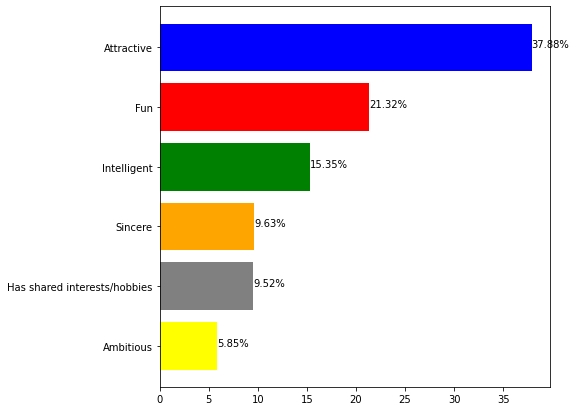

In [253]:
color=['b','orange','g','r','yellow','grey']

data2 = {'Label':h_decision,
        'Note':h_tab_decision,
        'Color':color}
# Create DataFrame
df2 = pd.DataFrame(data2)
df2=df2.sort_index(by='Note', ascending=True)

data3 = {'Label':f_decision,
        'Note':f_tab_decision,
        'Color':color}
# Create DataFrame
df3 = pd.DataFrame(data3)
df3=df3.sort_index(by='Note', ascending=True)

# ce qui a le plus compté chez l'homme'

plt.figure(figsize=(7,7))


labels = df2.Label
sizes = df2.Note
plt.barh(df2.Label,df2.Note,color=df2.Color)

for i in range(len(h_decision)):
    plt.text(df2.Note[i], df2.Label[i],'{}%'.format(df2.Note[i]))

plt.show()



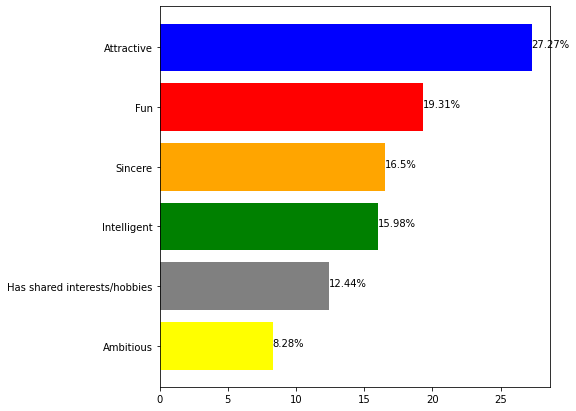

In [254]:
# ce qui a le plus compté chez la femme
plt.figure(figsize=(7,7))

labels = df3.Label
sizes = df3.Note
plt.barh(df3.Label,df3.Note,color=df3.Color)

for i in range(len(h_decision)):
    plt.text(df3.Note[i], df3.Label[i],'{}%'.format(df3.Note[i]))

plt.show()

# Importance de la race


C:\Users\jrala\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
C:\Users\jrala\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)


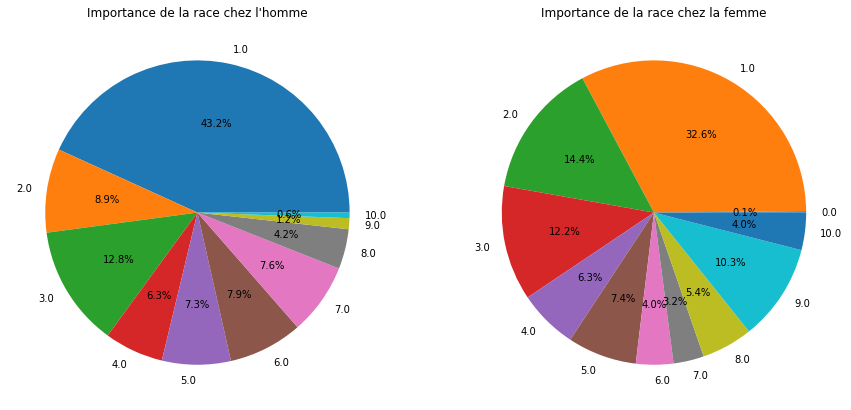

In [221]:


racehom=yes_hom_dataset.imprace
racehom_tab=racehom.value_counts(dropna=True)

data2 = {'Label':racehom_tab.index,
        'Note':racehom_tab.values}
# Create DataFrame
df2 = pd.DataFrame(data2)
df2=df2.sort_index(by='Label', ascending=True)

racefem=yes_fem_dataset.imprace
racefem_tab=racefem.value_counts(dropna=True)

data3 = {'Label':racefem_tab.index,
        'Note':racefem_tab.values}
# Create DataFrame
df3 = pd.DataFrame(data3)
df3=df3.sort_index(by='Label', ascending=True)


plt.figure(figsize=(15,7))

plt.subplot(121)

labels = df2.Label
sizes = df2.Note
plt.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=False,radius=1
       )
plt.title("Importance de la race chez l'homme")

plt.subplot(122)

labels = df3.Label
sizes = df3.Note
plt.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=False,radius=1
       )
plt.title("Importance de la race chez la femme")

plt.show()
